## Feature_Selection
- Feature_selection (특성에 대한 선택) 피처선택
    - ML에서 모델 입력 변수 중 가장 중요한 변수를 선택해서 모델의 성능을 최적화
    - 불필요한 데이터를 제거하는 경우
    - 데이터 분석을 진행시 중요한 피처들을 확인할 수 있다.
    
- Machine Learning 관점에서 ?
    - 피처가 중요한 이유는 ML 데이터 기반 학습 ->input 당연히 중요하다! 
    - 무조건적인 Feature Selection 좋은 건 아니다. 
    - 오히려 당연한 결과 또는 왜곡된 결과를 만들 수 있다. 
    - 모델의 성능 향상 - Why? 왜 모델의 성능이 향상이 되나? 
        - 피처가 많으면 모델의 성능이 더 좋지 않을까? -> 어떤 모델과 분석 목적에 따라 다르겠지만, 피처가 너무 많으면 안 좋다. 
            - 차원의 저주
            - 해석 자체가 어렵다.
            - 과적합
            - 기타 이슈
            - 노이즈가 감소 -> 노이즈가 어떤 영향을? 
            - 차원축소 -> 차원이 많다면 어떤 의미? 축소가 된다라는 게 정말 좋은 의미인가?
            - 도메인을 통해서 피처를 잘 선택해야 한다. 
        - Feature Selection을 통해 모든 성능이 다 좋아진다? 라는 건 아닌 것 같다. 떨어질 수 있다. 
        - 적정한 기준 등은 도메인과 함께 해야 한다. 
    - 계산량 감소 -> 비용적인 측면 확실하게 좋을 수 있다.

- 데이터 분석 관점에서 ?
    - 중요한 피처를 파악하면 데이터 분석에 대한 출발점이 빠르게 확인 가능할 것
    - 내가 원하는 분석 목적에 더 빠르게 시작할 수 있다. 
    
### Filter Method (필터방식)
    - 데이터의 통계적인 특성 기반하여 중요도 평가하고 선택하는 방식
    - 상관계수 (Correlation Coefficient) : 특성과 타겟 변수간의 상관관계 제거 
    - 카이제곱 테스트 (Chi-Square Test) : 범주형 데이터 타겟과 독립성 테스를 통해서 제거 or 선택
    - 분산 (Variacne Threshold) : 분산이 너무 작은 특성을 제거 형태 방식
    
    - 제거에 대한 기준 임계점이 필요하다.
    - 임계점은 도메인과 함께 다른 피처들과 비교를 해야 한다.
    - 우리가 수업 때 하는 방식은 단순하게 값이 나오고 특정 임계점을 랜덤하게 찍어서 추출하는 형태

In [1]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

- 상관계수를 통해서 피처를 선택한다라는 게 무슨 의미일까?
- 독립변수와 종속변수와의 관계
- 독립변수와 독립변수간의 관계

In [2]:
# X,y 독립변수와 종속변수와의 관계


np.random.seed(111)
n_samples= 1000

In [3]:
## 특성 피처들 생성

X1 = np.random.rand(n_samples) * 100 # X1 y와 상관관계가 높도록 설정
X2 = np.random.rand(n_samples) * 100 # X2도 y와 상관관계 높다
X3 = np.random.rand(n_samples) * 100 # X3 y와 상관관계 약함 
X4 = np.random.rand(n_samples) * 100 # X4 y와 거의 상관관계 없음
X_noise = np.random.rand(n_samples) * 100 #노이즈

# X1, X2 강하게 의존하는 형태, 나머지는 거의 영향이 없음
y = 3 *X1 + 2*X2 +np.random.randn(n_samples)*10

In [4]:
df=pd.DataFrame({
    'X1':X1,
    'X2':X2,
    'X3':X3,
    'X4':X4,
    'X_noise':X_noise,
    'y':y
})

In [5]:
## 상관계수를 확인하기
df.corr()

,X1,X2,X3,X4,X_noise,y
X1,1.000000,0.001169,-0.020710,-0.004450,0.005487,0.831148
X2,0.001169,1.000000,0.008571,-0.032957,0.055837,0.549372
X3,-0.020710,0.008571,1.000000,-0.027904,-0.079788,-0.012193
X4,-0.004450,-0.032957,-0.027904,1.000000,0.003884,-0.022084
X_noise,0.005487,0.055837,-0.079788,0.003884,1.000000,0.035962
y,0.831148,0.549372,-0.012193,-0.022084,0.035962,1.000000


In [6]:
#corr_matrix
corr_matrix=df.corr()['y'].drop('y')

In [7]:
corr_matrix

X1         0.831148
X2         0.549372
X3        -0.012193
X4        -0.022084
X_noise    0.035962
Name: y, dtype: float64

In [8]:
#0.5 특성만 뽑아보자!
threshold=0.5
selected_features =corr_matrix[abs(corr_matrix)>threshold].index

print(selected_features)

Index(['X1', 'X2'], dtype='object')


In [9]:
#LinearRegression

#데이터 분할 _선택된 피처로
X_selected = df[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected,df['y'],test_size=0.2,random_state=111)

#모델학습
model = LinearRegression()
model.fit(X_train, y_train)

#예측 MSE
y_pred =model.predict(X_test)
mse_selected =mean_squared_error(y_test, y_pred)
print('mse_selected',mse_selected)

mse_selected 94.10335912108978


In [10]:
##전체 데이터랑 비교하면 

#LinearRegression

#데이터 분할 _선택된 피처로
X_full = df.drop(columns = ['y'])
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full,df['y'],test_size=0.2,random_state=111)

#모델학습
model_full = LinearRegression()
model_full.fit(X_train_full, y_train_full)

#예측 MSE
y_pred_full =model_full.predict(X_test_full)
mse_full =mean_squared_error(y_test_full, y_pred_full)
print('mse_full',mse_full)

mse_full 94.29334037001018


In [11]:
94.10335912108972 -94.29334037001027

-0.1899812489205459

### 피처들과 피처들의 관계
- 독립변수 독립변수의 관계

In [12]:
## 특성 피처들 생성

X1 = np.random.rand(n_samples) * 100 # 
X2 = X1+np.random.rand(n_samples) * 10 # X1과 매우 높은 상관관계
X3 = np.random.rand(n_samples) * 100 # 
X4 = np.random.rand(n_samples) * 100 # 
X_noise = np.random.rand(n_samples) * 100 #

# y는 X1, X2 강하게 의존하는 관계
y = 3 *X1 + 2 * X3 +np.random.randn(n_samples) * 10

In [13]:
df=pd.DataFrame({
    'X1':X1,
    'X2':X2,
    'X3':X3,
    'X4':X4,
    'X_noise':X_noise,
    'y':y
})

In [14]:
import seaborn as sns

In [15]:
## 상관관계를 보자

#corr_matrix
corr_matrix=df.drop(columns=['y']).corr()
print(corr_matrix)

               X1        X2        X3        X4   X_noise
X1       1.000000  0.995198  0.006631  0.004226 -0.059031
X2       0.995198  1.000000  0.004092  0.003307 -0.055824
X3       0.006631  0.004092  1.000000  0.054634  0.018191
X4       0.004226  0.003307  0.054634  1.000000 -0.010967
X_noise -0.059031 -0.055824  0.018191 -0.010967  1.000000


<Axes: >

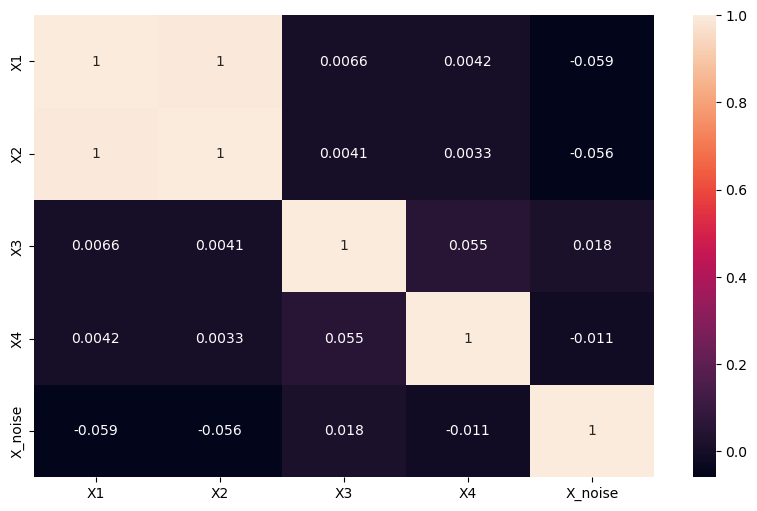

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True)

In [17]:
corr_matrix

,X1,X2,X3,X4,X_noise
X1,1.000000,0.995198,0.006631,0.004226,-0.059031
X2,0.995198,1.000000,0.004092,0.003307,-0.055824
X3,0.006631,0.004092,1.000000,0.054634,0.018191
X4,0.004226,0.003307,0.054634,1.000000,-0.010967
X_noise,-0.059031,-0.055824,0.018191,-0.010967,1.000000


In [18]:
## 상관계수가 threshold 0.8 이상인 경우는 제거를 한다.
## X1, X2 상관관계가 높다 -> 왜 제거를 해야 하나?
## X1, X2 상관관계가 높다- > 같이 움직인다.X1 증가하면 X2 증가한다는 뜻,같이 움직이므로 선형회귀에서 오차 계산 등이 오차 값이 계산될 때 더 큰 영향을 준다.
## 다중공선성의 문제라 하고 대부분 다중공선성이 높은 피처들은 제거를 한다.

threshold = 0.8
to_drop = set()

#상관계수가 높은 피처만 출력
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > threshold:
            to_drop.add(corr_matrix.columns[i])
print(to_drop)

#원하는 피처만 제거함
X_reduced =df.drop(columns=list(to_drop)+['y'])

X_train, X_test, y_train, y_test = train_test_split(X_reduced, df['y'], test_size=0.3, random_state=111)


{'X2'}


In [19]:
X_standardized = (X_reduced - X_reduced.mean())/X_reduced.std()
y_standardized = (df['y'] - df['y'].mean())/df['y'].std()
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_standardized, test_size=0.3, random_state=111)

In [20]:
# 상관계수가 높은 피처를 제거했을 때
#모델학습
model = LinearRegression()
model.fit(X_train, y_train)

#예측 MSE
y_pred =model.predict(X_test)
mse_selected =mean_squared_error(y_test, y_pred)
print('mse_selected',mse_selected)

mse_selected 0.009058845506601031


In [21]:
## 전체 피처가 다 들어간 경우
#데이터 분할 _선택된 피처로
X_full = df.drop(columns = ['y'])
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full,df['y'],test_size=0.2,random_state=111)

In [22]:
X_standardized = (X_full - X_full.mean())/X_full.std()
y_standardized = (df['y'] - df['y'].mean())/df['y'].std()

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_standardized, y_standardized, test_size=0.3, random_state=111)

In [23]:

#모델학습
model_full = LinearRegression()
model_full.fit(X_train_full, y_train_full)

#예측 MSE
y_pred_full =model_full.predict(X_test_full)
mse_full =mean_squared_error(y_test_full, y_pred_full)
print('mse_full',mse_full)

mse_full 0.009068534030425119


In [24]:
#모델학습
model_full = LinearRegression()
model_full.fit(X_train_full, y_train_full)

#예측 MSE
y_pred_full =model_full.predict(X_test_full)
mse_full =mean_squared_error(y_test_full, y_pred_full)
print('mse_full',mse_full)

mse_full 0.009068534030425119


### 선형회귀로 모델링
###  y값과 상관관계를 보는 것 ( 특성 선택의 목적 )  
- 피처와 타겟변수 y의 상관관계를 통해서 타겟변수와의 상관성이 높은 피처를 선택하는 것
- 타겟 변수와 상관관계 높은 피처가 있다면 -> 잘 예측할 수 있다. 선형적인 회귀분석인데 타겟과 피처가 선형적인데 당연히 좋은 결과가 나온다.

### X 피처들간의 상관관계를 보는 것 ( 다중공선성 문제 해결 목적 ), 피처를 제거
- 피처들간 상관관계를 통해서 두 개 이상의 피처가 유사한 정보를 제공하는지 ( 선형성 같이 움직이는지 )
- 다중공선성을 해결하기위한 방법으로도 확인 가능하다 -> 모델이 불안정해진다. 상관계수가 높은 피처들이 같이 잇으면, 제대로 평가를 못하는 경우가 발생


- 피처에 대한 선택도 기준에 따라 제거, 선택도 가능하고 모든 피처가 실제 성능이 다 올라가거나 떨어지는 건 아니다.
- 피처에 대한 이해도도 중요하지만, 데이터, 도메인, 모델 이 모든 것을 다 이해하고 있어야 이 수치가 왜 이렇게 나오는지? 조금은 더 이해할 수 있다.

### 필수과제 (다음 주까지 제출)
### 3주차 모두 과제가 다 제출할  수 있음
- sklean에서 제공하는 california housing 데이터 존재 코드 공유 예정
- 집값 다른 여러 피처들이 존재
- 전체 피처를 학습하고 MSE 계산한 것과, 여러분들이 직접 filter 방식으로 상관계수를 통해 피처를 선택해서 학습한 후 mse 비교
- 어떤 피처를 선택했는지, 그리고 추가로 집값에 대한 데이터라 도메인을 좀 더 추가해서 어떤 식으로 선택하면 더 좋을지 추가!

In [43]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 캘리포니아 주택 데이터셋 불러오기
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

In [44]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
